# 2021/11/17
# 本代码使用famil绘制降水图
# 论文用图

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import sys

sys.path.append("/home/sun/mycode/module/")
from module_sun import *

In [2]:
time_slice  =  slice(100,201)
lat_slice   =  slice(10,25)
lon_slice   =  slice(55,145)

path            =  "/home/sun/qomo-data/zhuang_plev/"
f               =  xr.open_dataset(path+"famil_zhuang_con_prect.nc")
control_prect   =  xr.open_dataset(path+"famil_zhuang_con_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
noic_prect      =  xr.open_dataset(path+"famil_zhuang_ic_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
noid_prect      =  xr.open_dataset(path+"famil_zhuang_id_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
noicid_prect    =  xr.open_dataset(path+"famil_zhuang_icid_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)

# 计算区域平均

In [3]:
np.set_printoptions(suppress=True)
#Compute weights and take weighted average over latitude dimension
weights      =  np.cos(np.deg2rad(noic_prect.lat.values))

avg_control  =  (control_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
avg_noic     =  (noic_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
avg_noid     =  (noid_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
avg_noicid   =  (noicid_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)

# 定一下时间坐标

In [4]:
# 设置时间坐标
y_tick = [100,110,120,130,140,150,161,171,181,191,201]
y_label = ['10Apr','20Apr','30Apr','10May','20May','30May','10Jun','20Jun','30Jun','10Jul','20Jul']

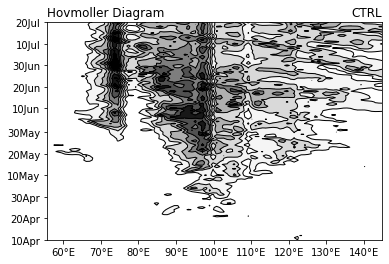

In [5]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('CTRL', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.linspace(7.2,21.6,7)/24
cf   = ax2.contourf(control_prect.lon.values, control_prect.time.values, avg_control/24, clevs, cmap='Greys', extend='both')
cs   = ax2.contour(control_prect.lon.values,  control_prect.time.values, avg_control/24, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

plt.savefig("/home/sun/paint/lunwen/famil_con_prect_hov.pdf",dpi=600)
plt.show()

In [6]:
time_slice  =  slice(100,201)
lat_slice   =  slice(15,25)
lon_slice   =  slice(55,145)

path            =  "/home/sun/qomo-data/zhuang_plev/"
f               =  xr.open_dataset(path+"famil_zhuang_con_prect.nc")
control_prect   =  xr.open_dataset(path+"famil_zhuang_con_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
noic_prect      =  xr.open_dataset(path+"famil_zhuang_ic_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
noid_prect      =  xr.open_dataset(path+"famil_zhuang_id_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)
noicid_prect    =  xr.open_dataset(path+"famil_zhuang_icid_prect.nc").sel(time=time_slice,lat = lat_slice,lon = lon_slice)

np.set_printoptions(suppress=True)
#Compute weights and take weighted average over latitude dimension
weights      =  np.cos(np.deg2rad(noic_prect.lat.values))

avg_control  =  (control_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
avg_noic     =  (noic_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
avg_noid     =  (noid_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)
avg_noicid   =  (noicid_prect.prect*weights[None, :, None]).sum(dim='lat')/np.sum(weights)

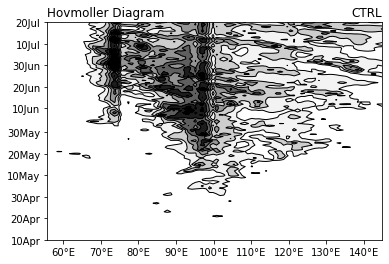

In [7]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('CTRL', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.linspace(7.2,21.6,6)/24
cf   = ax2.contourf(control_prect.lon.values, control_prect.time.values, avg_control/24, clevs, cmap='Greys', extend='both')
cs   = ax2.contour(control_prect.lon.values,  control_prect.time.values, avg_control/24, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

plt.savefig("/home/sun/paint/lunwen/famil_con_prect_hov.pdf",dpi=600)
plt.show()

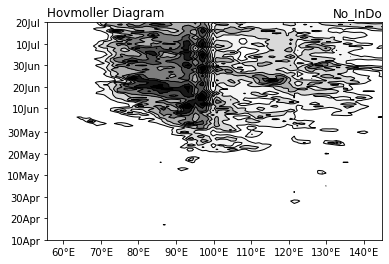

In [8]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('No_InDo', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.linspace(7.2/24,21.6/24,7)
cf   = ax2.contourf(control_prect.lon.values, noid_prect.time.values, 0.9*avg_noid/24, clevs, cmap='Greys', extend='both')
cs   = ax2.contour(control_prect.lon.values,  noid_prect.time.values, 0.9*avg_noid/24, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

plt.savefig("/home/sun/paint/lunwen/famil_noid_prect_hov.pdf",dpi=600)
plt.show()

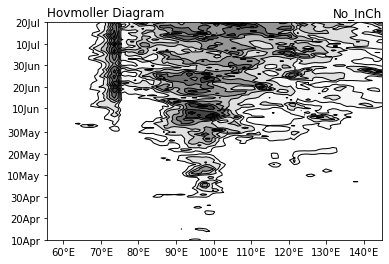

In [9]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('No_InCh', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.linspace(7.6/24,26.4/24,8)
cf   = ax2.contourf(control_prect.lon.values, noic_prect.time.values, avg_noic/24, clevs, cmap='Greys', extend='both')
cs   = ax2.contour(control_prect.lon.values,  noic_prect.time.values, avg_noic/24, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

plt.savefig("/home/sun/paint/lunwen/famil_noic_prect_hov.pdf",dpi=600)
plt.show()

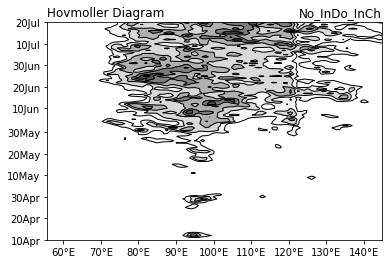

In [10]:
# Start figure
fig,ax2  =  plt.subplots()
# Use gridspec to help size elements of plot; small top plot and big bottom plot
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 6], hspace=0.01)

# Tick labels
x_tick_labels = []
for xx in range(60,141,10):
    x_tick_labels.append(u''+str(xx)+"\N{DEGREE SIGN}E")


# Set some titles
plt.title('Hovmoller Diagram', loc='left')
plt.title('No_InDo_InCh', loc='right')



# Plot of chosen variable averaged over latitude and slightly smoothed
clevs = np.linspace(9.6/24,26.4/24,7)
cf   = ax2.contourf(control_prect.lon.values, noid_prect.time.values, avg_noicid/24, clevs, cmap='Greys', extend='both')
cs   = ax2.contour(control_prect.lon.values,  noid_prect.time.values, avg_noicid/24, clevs, colors='k', linewidths=1)
#cbar = fig.colorbar(cf, ax=ax2, orientation='horizontal', pad=0.09, aspect=50,extend='both')
#cbar.set_label('mm $day^{-1}$')

ax2.set_xticks(np.arange(60,141,10))
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(labelsize=10)

ax2.set_yticks(y_tick)
ax2.set_yticklabels(y_label)

plt.savefig("/home/sun/paint/lunwen/famil_noicid_prect_hov.pdf",dpi=600)
plt.show()

In [91]:
np.linspace(7.2,21.6,7)/24

array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [17]:
np.linspace(9.6,20,10)

array([ 9.6       , 10.75555556, 11.91111111, 13.06666667, 14.22222222,
       15.37777778, 16.53333333, 17.68888889, 18.84444444, 20.        ])